# Research on marketing expenses optimization
> Purpose: to help optimize marketing expenses.

# Summary

An investigation was conducted to help optimize marketing expenses. Based on the data given, on average there are 907 daily active users, 5716 weekly active users as well as 5716 monthly active users. Of those respective active users, the device utilized the most are desktop users. Additionally, each user spends roughly one session on the product with each session being about 60 seconds in duration. Users are about 16% likely to return every week and about 4% likely to return every month. In particular, it looks like people start buying products during October, November, and December. This could be due to purchasing products that are seasonal for popular holidays during those months such as Halloween, Thanksgiving, or Christmas. Coincidentally, the data shows that the average number of orders made over a period of time by an individual is between one to two. Accordingly, the average purchase size is around \\$14.00. Users are responding the most to ad source #4 followed by #3, #5, #2 and this is also evident in the months with the most visits as well as the months with the most revenue generated.

Overall expenses spent on the ads was \\$329,131.62. Over time, money spent on ads began to increase in August 2017. The most money being expended in ads was between October 2017 and December 2017. Afterward, ad expenses begin to fall and stabilize beginning of April 2018. The data showed that most expenses were allocated to ad source #3. Furthermore, acquiring each customer costs an average of \\$9.15 while each customer spends about \\$3.64 in their lifetime with regards to using/buying the company's product. In spite of this fact, the report shows that investments in marketing is unprofitable due to CAC exceeds LTV. None of the cohorts display signs of the ROMI paying off&mdash;there is a significant decrease in ROMI by the next month of each cohort.

To this end, the following is suggested to help optimize marketing expenses: more money should be allocated to ad source #4 and more ads should be executed throughout October, November, and December.

## Open the data file and study the general information

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

try:
    visits = pd.read_csv(
            '/datasets/visits_log_us.csv',
            dtype={'Device': 'category'},
            parse_dates=['Start Ts', 'End Ts'])
    orders = pd.read_csv(
            '/datasets/orders_log_us.csv',
            parse_dates=['Buy Ts'])
    costs = pd.read_csv(
            '/datasets/costs_us.csv',
            parse_dates=['dt'])
except:
    visits = pd.read_csv(
            'visits_log_us.csv',
            dtype={'Device': 'category'},
            parse_dates=['Start Ts', 'End Ts'])
    orders = pd.read_csv(
            'orders_log_us.csv',
            parse_dates=['Buy Ts'])
    costs = pd.read_csv(
            'costs_us.csv',
            parse_dates=['dt'])

In [2]:
visits.info(memory_usage='deep')
visits.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null category
End Ts       359400 non-null datetime64[ns]
Source Id    359400 non-null int64
Start Ts     359400 non-null datetime64[ns]
Uid          359400 non-null uint64
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


In [3]:
orders.info(memory_usage='deep')
orders.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null datetime64[ns]
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


In [4]:
costs.info(memory_usage='deep')
costs.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


### Conclusion
<ul>
<li><em>visits</em> dataset: The <em>Device</em> column was changed to the <em>category</em> data type, and the columns <em>Start Ts</em> and <em>End Ts</em> were changed to a date type. This resulted in decreasing memory usage from 13.7+ MB to 11.3 MB. Additionally, there are no observed missing values.</li><br>
<li><em>orders</em> dataset: The <em>Buy Ts</em> column was changed to a date type. This resulted in decreasing memory usage from 1.2+ MB to 1.2 MB. Additionally, there are no observed missing values.</li><br>
<li><em>costs</em> dataset: There are no missing values observed. The <em>dt</em> column was changed to a date type to attribute using as little memory as possible. This resulted in decreasing memory usage from 206.2 KB to 59.7 KB.</li>
</ul>

## Data preparation

In [5]:
# determining proportion of missing values for each dataset
print('Proportion of missing values for visits dataset:')
print(visits.isna().sum() / visits.shape[0])
print()
print('Proportion of missing values for orders dataset:')
print(orders.isna().sum() / orders.shape[0])
print()
print('Proportion of missing values for costs dataset:')
print(costs.isna().sum() / costs.shape[0])

Proportion of missing values for visits dataset:
Device       0.0
End Ts       0.0
Source Id    0.0
Start Ts     0.0
Uid          0.0
dtype: float64

Proportion of missing values for orders dataset:
Buy Ts     0.0
Revenue    0.0
Uid        0.0
dtype: float64

Proportion of missing values for costs dataset:
source_id    0.0
dt           0.0
costs        0.0
dtype: float64


In [6]:
# checking for duplicates
print('visits duplicates:')
print(visits.duplicated().sum())
print()
print('orders duplicates:')
print(orders.duplicated().sum())
print()
print('costs duplicates:')
print(costs.duplicated().sum())

visits duplicates:
0

orders duplicates:
0

costs duplicates:
0


### Conclusion

There are no missing values or duplicates discernible for all three datasets.

## Make reports and calculate metrics

#### Reports and metrics for product

In [7]:
visits['session_year']  = visits['Start Ts'].dt.year
visits['session_month'] = visits['Start Ts'].dt.month
visits['session_week']  = visits['Start Ts'].dt.week
visits['session_date'] = visits['Start Ts'].dt.date
visits.head(10)

# calculating DAU
dau_total = visits.groupby('session_date').agg({'Uid': 'nunique'}).mean()
print('Daily Active Users:',int(dau_total))

# calculating WAU
wau_total = visits.groupby(['session_year', 'session_week']).agg({'Uid': 'nunique'}).mean()
print('Weekly Active Users:',int(wau_total))

# calculating MAU
mau_total = visits.groupby(['session_year', 'session_month']).agg({'Uid': 'nunique'}).mean()
print('Monthly Active Users:',int(wau_total))

Daily Active Users: 907
Weekly Active Users: 5716
Monthly Active Users: 5716


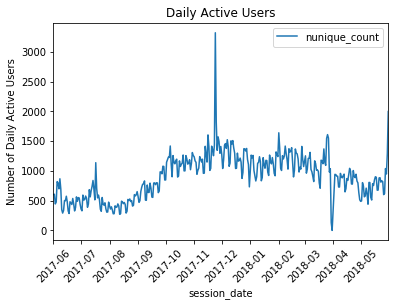

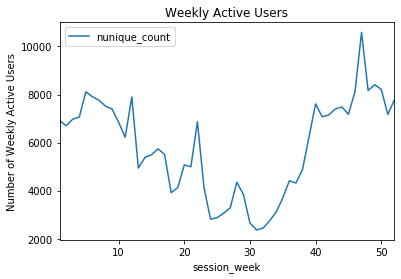

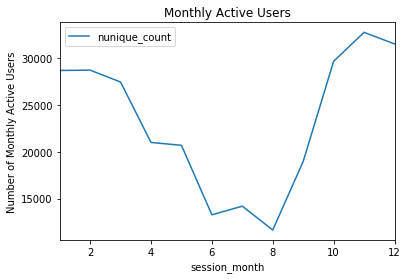

In [8]:
visits_dau = visits.groupby('session_date').agg({'Uid': 'nunique'})
visits_dau = visits_dau.reset_index()
visits_dau.columns = ['session_date', 'nunique_count']
ax = visits_dau.plot(y='nunique_count', x='session_date', title='Daily Active Users')
plt.xticks(rotation=45)
ax.set(xlabel="session_date", ylabel="Number of Daily Active Users")
plt.show()
visits_wau = visits.groupby('session_week').agg({'Uid': 'nunique'})
visits_wau = visits_wau.reset_index()
visits_wau.columns = ['session_week', 'nunique_count']
ax = visits_wau.plot(y='nunique_count', x='session_week', title='Weekly Active Users')
ax.set(xlabel="session_week", ylabel="Number of Weekly Active Users")
plt.show()
visits_mau = visits.groupby('session_month').agg({'Uid': 'nunique'})
visits_mau = visits_mau.reset_index()
visits_mau.columns = ['session_month', 'nunique_count']
ax = visits_mau.plot(y='nunique_count', x='session_month', title='Monthly Active Users')
ax.set(xlabel="session_month", ylabel="Number of Monthly Active Users")
plt.show()

**Figure 1: Daily, Weekly, and Monthly Active Users**

*Description:*

**Daily Active Users:** The graph illustrating daily active users show a gradual increase in usage with a sudden spike between November 2017 and December 2017. Daily usage remains stable after December until an abrupt drop between March 2018 and April 2018, and then a surge beginning of April 2018 to which daily active use is stabilized.

**Weekly Active Users:** The graph illustrating weekly active users show fluctuation with a downwards trend until about the 30th ordinal week (end of July 2017). Then there is a steady increase until about the 45th ordinal week (November 5, 2017&mdash;November 11, 2017) followed by stabilization from the limited graph.

**Monthly Active Users:** The graph illustrating monthly active users initially shows a downward trend to about August 2017 and then a steady increase of active users until November 2017.

In [9]:
# creating DFs by device type
visits_desktop = visits.query('Device == "desktop"')
visits_touch = visits.query('Device == "touch"')

In [10]:
# calculating how many sessions per day
sessions_per_user = visits.groupby(['session_date']).agg({'Uid': ['count', 'nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = (sessions_per_user['n_sessions'] / sessions_per_user['n_users'])
display(sessions_per_user)
print('Average sessions_per_user:',sessions_per_user['sessions_per_user'].mean())

,n_sessions,n_users,sessions_per_user
session_date,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024
...,...,...,...
2018-05-27,672,620,1.083871
2018-05-28,1156,1039,1.112608
2018-05-29,1035,948,1.091772


Average sessions_per_user: 1.082169644003972


In [11]:
# calculating how many sessions per day by device type
sessions_per_desktop = visits_desktop.groupby(['session_date']).agg({'Uid': ['count', 'nunique']})
sessions_per_desktop.columns = ['n_sessions', 'n_users']
sessions_per_desktop['sessions_per_user'] = (sessions_per_desktop['n_sessions'] / sessions_per_desktop['n_users'])
sessions_per_desktop
print('Average Sessions per Desktop User:',sessions_per_desktop['sessions_per_user'].mean())
print()
sessions_per_touch = visits_touch.groupby(['session_date']).agg({'Uid': ['count', 'nunique']})
sessions_per_touch.columns = ['n_sessions', 'n_users']
sessions_per_touch['sessions_per_user'] = (sessions_per_touch['n_sessions'] / sessions_per_touch['n_users'])
sessions_per_touch
print('Average Sessions per Touch Device User:',sessions_per_touch['sessions_per_user'].mean())

Average Sessions per Desktop User: 1.0889553115247612

Average Sessions per Touch Device User: 1.0510715741665035


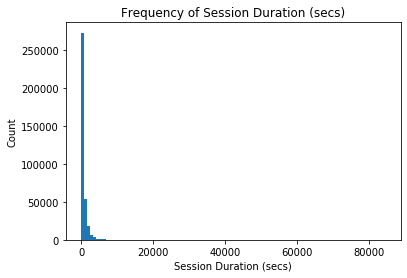


Average Session Duration (seconds): 0    60


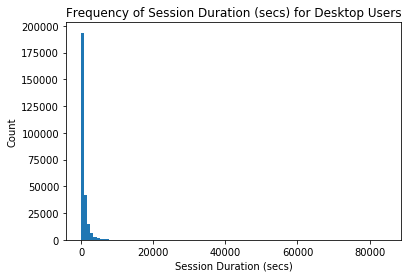


Average Session Duration for Desktop Users (seconds): 0    60


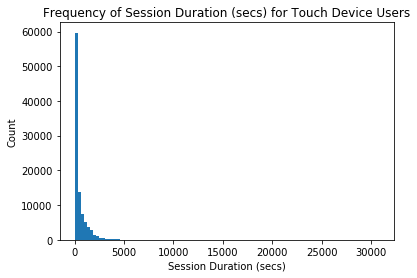


Average Session Duration for Touch Device Users (seconds): 0    60


In [12]:
# calculating the length of each session
visits['session_duration_sec'] = (visits['End Ts'] - visits['Start Ts']).dt.seconds
ax = visits['session_duration_sec'].plot(kind='hist', bins=100, title='Frequency of Session Duration (secs)')
ax.set(xlabel="Session Duration (secs)", ylabel="Count")
plt.show()
print()
print('Average Session Duration (seconds):',visits['session_duration_sec'].mode().to_string())

# calculating the length of each session by device
visits_desktop['session_duration_sec'] = (visits_desktop['End Ts'] - visits_desktop['Start Ts']).dt.seconds
ax = visits_desktop['session_duration_sec'].plot(kind='hist', bins=100, 
                                                 title='Frequency of Session Duration (secs) for Desktop Users')
ax.set(xlabel="Session Duration (secs)", ylabel="Count")
plt.show()
print()
print('Average Session Duration for Desktop Users (seconds):',visits_desktop['session_duration_sec'].mode().to_string())

visits_touch['session_duration_sec'] = (visits_touch['End Ts'] - visits_touch['Start Ts']).dt.seconds
ax = visits_touch['session_duration_sec'].plot(kind='hist', bins=100, 
                                                 title='Frequency of Session Duration (secs) for Touch Device Users')
ax.set(xlabel="Session Duration (secs)", ylabel="Count")
plt.show()
print()
print('Average Session Duration for Touch Device Users (seconds):',visits_touch['session_duration_sec'].mode().to_string())

**Figure 2: Frequency of Session Duration (secs) Overall and per Device Type**

*Description:* The session lengths for the above histograms are right-skewed and thus not normally distributed. For this reason, the mode will be used for the average session duration which is 60 seconds.

In [13]:
# calculating sticky factor
sticky_week = dau_total / wau_total
sticky_month = dau_total / mau_total
print('Weekly return:', sticky_week.to_string())
print()
print('Monthly return:', sticky_month.to_string())

Weekly return: Uid    0.158844

Monthly return: Uid    0.03909


In [14]:
# calculating DAU/WAU/MAU for desktop
dau_desktop = visits_desktop.groupby('session_date').agg({'Uid': 'nunique'}).mean()
print('Daily Active Users by Desktop:',int(dau_desktop))

wau_desktop = visits_desktop.groupby(['session_year', 'session_week']).agg({'Uid': 'nunique'}).mean()
print('Weekly Active Users by Desktop:',int(wau_desktop))

mau_desktop = visits_desktop.groupby(['session_year', 'session_month']).agg({'Uid': 'nunique'}).mean()
print('Monthly Active Users by Desktop:',int(mau_desktop))

Daily Active Users by Desktop: 659
Weekly Active Users by Desktop: 4129
Monthly Active Users by Desktop: 16724


In [15]:
# calculating DAU/WAU/MAU for touch
dau_touch = visits_touch.groupby('session_date').agg({'Uid': 'nunique'}).mean()
print('Daily Active Users by Touch Device:',int(dau_touch))

wau_touch = visits_touch.groupby(['session_year', 'session_week']).agg({'Uid': 'nunique'}).mean()
print('Weekly Active Users by Touch Device:',int(wau_touch))

mau_touch = visits_touch.groupby(['session_year', 'session_month']).agg({'Uid': 'nunique'}).mean()
print('Monthly Active Users by Touch Device:',int(mau_touch))

Daily Active Users by Touch Device: 252
Weekly Active Users by Touch Device: 1634
Monthly Active Users by Touch Device: 6825


### Conclusion
According to the data, on average there are 907 daily active users, 5716 weekly active users as well as 5716 monthly active users. Of those respective active users, the device utilized the most are desktop users. Additionally, each user spends roughly one session on the product. The distribution of session duration is not close to normally distributed, and so the mode was taken into account to determine the length of each session is about 60 seconds long. Users are about 16% likely to return every week and about 4% likely to return every month.

#### Reports and metrics for sales

Device,desktop,touch
Source Id,,
1,25901,8220
2,35661,11965
3,65777,19833
4,67640,34154
5,50069,16836
6,5,1
7,28,8
9,10119,3158
10,7367,2658


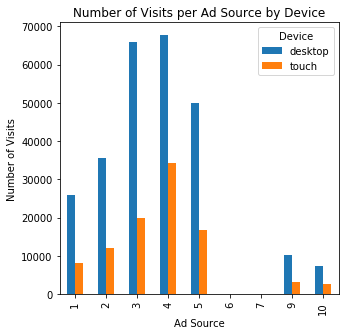

In [16]:
visits_pivot = visits.pivot_table(index='Source Id', columns='Device', values='Uid', aggfunc='count')
display(visits_pivot)
ax = visits_pivot.sort_values('Source Id', ascending=True).plot(kind='bar', figsize=(5,5), title='Number of Visits per Ad Source by Device')
ax.set_xlabel('Ad Source')
ax.set_ylabel('Number of Visits')
plt.show()

**Figure 3: Number of Visits per Ad Source by Device**

*Description:* The bar graph shows that ad source #4 is bringing in the most visits followed by ad source #3, #5, #2, #1, #9, #10, #7, and the least is #6.

In [17]:
first_visit_date = visits.groupby(['Uid'])['Start Ts'].min()
first_visit_date.name = 'first_visit_date'
visits = visits.join(first_visit_date, on='Uid')
visits['visit_week'] = pd.to_datetime(visits['Start Ts'], unit='d') - pd.to_timedelta(visits['Start Ts'].dt.dayofweek, unit='d')
visits['first_visit_week'] = pd.to_datetime(visits['first_visit_date'], unit='d') - pd.to_timedelta(
    visits['first_visit_date'].dt.dayofweek, unit='d'
)
visits['visit_month'] = visits['Start Ts'].astype('datetime64[M]')
visits['first_visit_month'] = visits['first_visit_date'].astype('datetime64[M]')

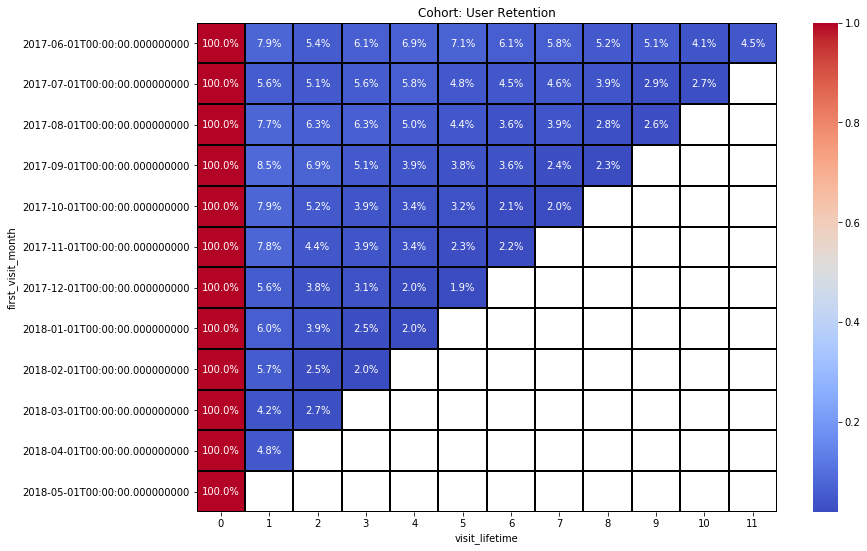

In [18]:
visits['visit_lifetime'] = visits['visit_month'] - visits['first_visit_month']
visits['visit_lifetime'] = visits['visit_lifetime'] / np.timedelta64(1, 'M')
visits['visit_lifetime'] = visits['visit_lifetime'].round().astype('int')
visits_cohorts = (
    visits.groupby(['first_visit_month', 'visit_lifetime'])
    .agg({'Uid': 'nunique'})
    .reset_index()
)
initial_users_count = visits_cohorts[visits_cohorts['visit_lifetime'] == 0][
    ['first_visit_month', 'Uid']
]
initial_users_count = initial_users_count.rename(
    columns={'Uid': 'cohort_users'})
visits_cohorts = visits_cohorts.merge(initial_users_count, on='first_visit_month')
visits_cohorts['retention'] = visits_cohorts['Uid'] / visits_cohorts['cohort_users']
retention_pivot = visits_cohorts.pivot_table(
    index='first_visit_month',
    columns='visit_lifetime',
    values='retention',
    aggfunc='sum',
)
plt.figure(figsize=(13, 9))
plt.title('Cohort: User Retention')
sns.heatmap(
    retention_pivot,
    annot=True,
    fmt='.1%',
    linewidths=1,
    linecolor='black',
    cmap='coolwarm',
)
plt.show()

**Figure 4: Visitor User Retention**

*Description:* The first-month retention rate is steadily increasing up until the September 2017 cohort and then it gradually decreases with each new cohort thereafter. Those that joined the June 2017 cohort have the longest retention.

In [19]:
# observing which ad sources were utilized in October, Novemer, and December
most_visits_oct = visits.query('first_visit_month == "2017-10-01"')
print('Ads in October:')
print(most_visits_oct['Source Id'].value_counts())
print()
most_visits_nov = visits.query('first_visit_month == "2017-11-01"')
print('Ads in November:')
print(most_visits_nov['Source Id'].value_counts())
print()
most_visits_dec = visits.query('first_visit_month == "2017-12-01"')
print('Ads in December:')
print(most_visits_dec['Source Id'].value_counts())

Ads in October:
4     11928
3      9931
5      8788
2      4926
1      3447
9      1507
10     1147
7         8
Name: Source Id, dtype: int64

Ads in November:
4     12817
3     10840
5      7448
2      5993
1      3927
9      1756
10     1600
7         1
6         1
Name: Source Id, dtype: int64

Ads in December:
4     11946
3      9038
5      6439
2      3838
1      3036
9      1228
10      723
7         9
6         1
Name: Source Id, dtype: int64


In [20]:
orders['order_date'] = orders['Buy Ts'].dt.date
first_order_date = orders.groupby(['Uid'])['Buy Ts'].min()
first_order_date.name = 'first_order_date'
orders = orders.join(first_order_date, on='Uid')
orders['order_week'] = pd.to_datetime(orders['Buy Ts'], unit='d') - pd.to_timedelta(orders['Buy Ts'].dt.dayofweek, unit='d')
orders['first_order_week'] = pd.to_datetime(orders['first_order_date'], unit='d') - pd.to_timedelta(
    orders['first_order_date'].dt.dayofweek, unit='d'
)
orders['order_month'] = orders['Buy Ts'].astype('datetime64[M]')
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')

In [21]:
orders_cohort = orders.groupby(['first_order_month', 'order_month']).agg({'Revenue': 'sum', 'Uid': 'nunique'})
orders_cohort['rev_per_user'] = orders_cohort['Revenue'] / orders_cohort['Uid']
orders_cohort.pivot_table(index='first_order_month', columns='order_month', values='rev_per_user', aggfunc='mean')
orders_cohort = orders_cohort.reset_index()
orders_cohort['cohort_lifetime'] = orders_cohort['order_month'] - orders_cohort['first_order_month']
orders_cohort['cohort_lifetime'] = orders_cohort['cohort_lifetime'] / np.timedelta64(1, 'M')
orders_cohort['cohort_lifetime'] = orders_cohort['cohort_lifetime'].round().astype('int')
orders_cohort['first_order_month'].dt.strftime('%Y-%d-%m')
orders_cohort['first_order_month'] = orders_cohort['first_order_month'].dt.strftime('%Y-%m')

In [22]:
orders_cohort_count = orders.groupby(['first_order_month', 'order_month']).agg({'Revenue': 'count', 'Uid': 'nunique'}).rename(
    columns={'Revenue': 'count'})
orders_cohort_count['orders_per_user'] = orders_cohort_count['count'] / orders_cohort_count['Uid']
orders_cohort_count.pivot_table(index='first_order_month', columns='order_month', values='orders_per_user', aggfunc='mean')
orders_cohort_count = orders_cohort_count.reset_index()
orders_cohort_count['cohort_lifetime'] = orders_cohort_count['order_month'] - orders_cohort_count['first_order_month']
orders_cohort_count['cohort_lifetime'] = orders_cohort_count['cohort_lifetime'] / np.timedelta64(1, 'M')
orders_cohort_count['cohort_lifetime'] = orders_cohort_count['cohort_lifetime'].round().astype('int')
orders_cohort_count['first_order_month'].dt.strftime('%Y-%d-%m')
orders_cohort_count['first_order_month'] = orders_cohort_count['first_order_month'].dt.strftime('%Y-%m')

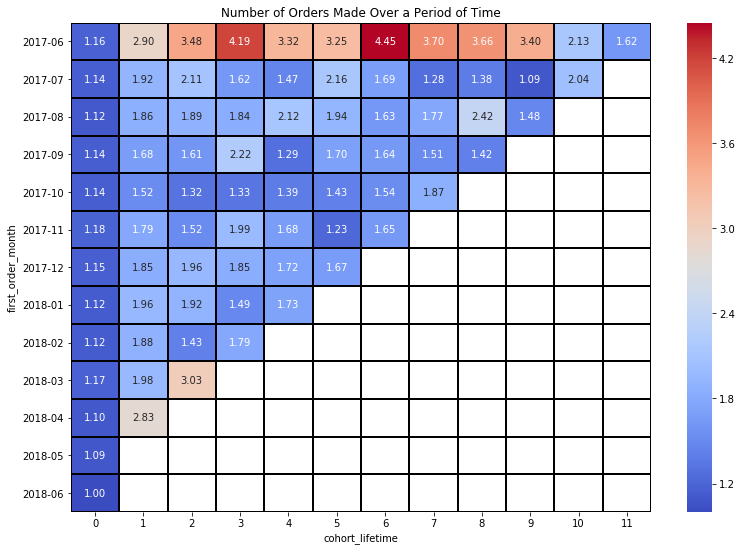

Average Orders per User: cohort_lifetime
0    1.125172


In [23]:
orders_per_user_pivot = orders_cohort_count.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='orders_per_user',
    aggfunc='mean',
)
plt.figure(figsize=(13, 9))
plt.title('Number of Orders Made Over a Period of Time')
sns.heatmap(
    orders_per_user_pivot,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='black',
    cmap='coolwarm',
)
plt.show()
print('Average Orders per User:', orders_per_user_pivot.loc[:,orders_per_user_pivot.columns.get_level_values(0).isin({'0'})].mean().to_string())

**Figure 5: Average Number of Orders Made Over a Period of Time**

*Description:* The number of orders made for each cohort increases to a certain point and then decreases for their respective lifetimes. For the most part, at the end of each cohort's lifetime, the number of orders made is greater than the initial cohort first month.

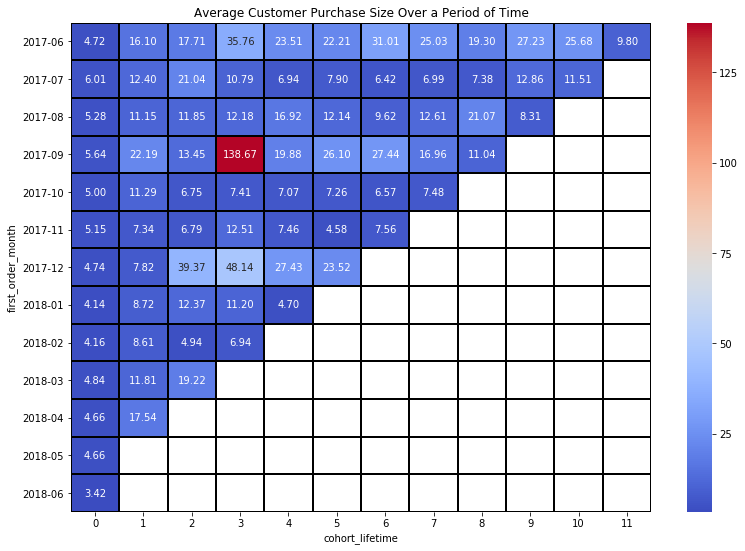

Average Orders per User: cohort_lifetime
0    4.801682


In [24]:
revenue_per_user_pivot = orders_cohort.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='rev_per_user',
    aggfunc='mean',
)
plt.figure(figsize=(13, 9))
plt.title('Average Customer Purchase Size Over a Period of Time')
sns.heatmap(
    revenue_per_user_pivot,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='black',
    cmap='coolwarm',
)
plt.show()
print('Average Orders per User:', revenue_per_user_pivot.loc[:,revenue_per_user_pivot.columns.get_level_values(0).isin({'0'})].mean().to_string())

**Figure 6: Average Customer Purchase Size Over a Period of Time**

*Description:* More often, it looks to be that the greatest average customer purchase size happens three months after the first order month of each cohort (excluding those whose cohort lifetime is less than three months).

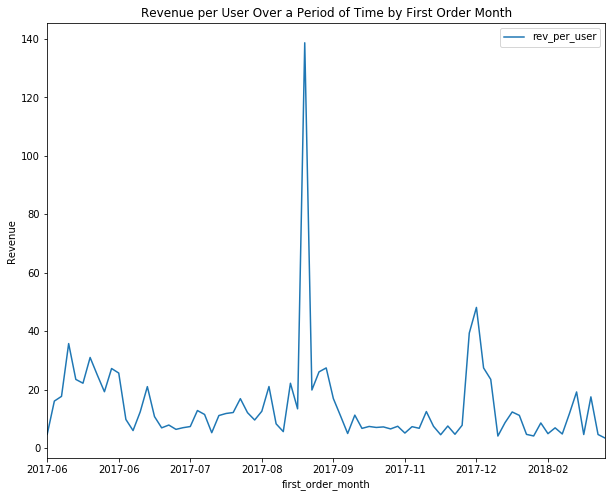

In [25]:
ax = orders_cohort.plot(x='first_order_month', y='rev_per_user', figsize=(10,8))
ax.set_ylabel('Revenue')
plt.title('Revenue per User Over a Period of Time by First Order Month')
plt.show()

**Figure 7: Revenue per User Over a Period of Time by First Order Month**

*Description:* The graph shows a stable trend until a sudden spike between August 2017 and September 2017. Afterwards, revenue per user stabilizes again until December 2017 where there is a little rise.

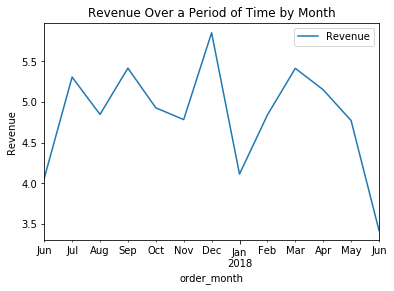

In [26]:
orders_overall = orders.pivot_table(index='order_month', values='Revenue', aggfunc='mean')
ax = orders_overall.plot()
ax.set_ylabel('Revenue')
plt.title('Revenue Over a Period of Time by Month')
plt.show()

**Figure 8: Revenue Over a Period of Time by Month**

*Description:* Revenue fluctuates between July 2017 and November 2017. However, there is a spike in revenue between November 2017 and December 2017. By January 2018, revenue drops and then gradually increases again beginning of March 2018. Then, there is a gradual decline in revenue onwards.

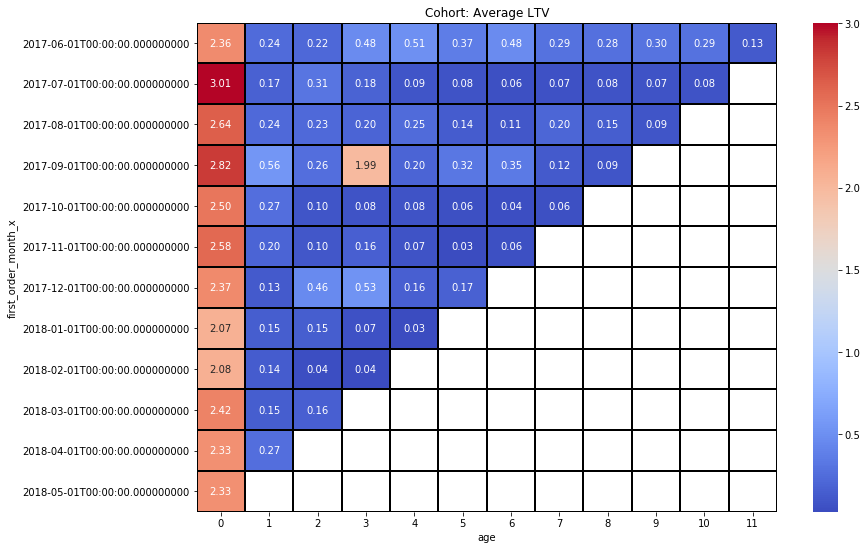

Average LTV for 6 months from the first order: 3.984526315103668


In [27]:
# calculating LTV
costs['month'] = costs['dt'].astype('datetime64[M]')
first_orders = orders.groupby('Uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['Uid', 'first_order_month']

cohort_sizes = (
    first_orders.groupby('first_order_month')
    .agg({'Uid': 'nunique'})
    .reset_index()
)
cohort_sizes.columns = ['first_order_month_x', 'n_buyers']
margin_rate = 0.5
orders_ = pd.merge(orders, first_orders, on='Uid')
cohorts = (
    orders_.groupby(['first_order_month_x', 'order_month'])
    .agg({'Revenue': 'sum'})
    .reset_index()
)
report = pd.merge(cohort_sizes, cohorts, on='first_order_month_x')

report['gp'] = report['Revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month_x']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report['ltv'] = report['gp'] / report['n_buyers']
result = report.pivot_table(
    index='first_order_month_x', columns='age', values='ltv', aggfunc='mean'
).round()

result = result.fillna('')

monthly_costs = costs.groupby('month').sum()
report_ = pd.merge(
    report, monthly_costs, left_on='first_order_month_x', right_on='month'
)
report_['cac'] = report_['costs'] / report_['n_buyers']
result = report_.pivot_table(
    index='first_order_month_x', columns='age', values='ltv', aggfunc='mean'
)
plt.figure(figsize=(13, 9))
plt.title('Cohort: Average LTV')
sns.heatmap(
    result,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='black',
    cmap='coolwarm',
)
plt.show()
m6_cum_ltv = result.cumsum(axis=1).mean(axis=0)[5]
print('Average LTV for 6 months from the first order:', m6_cum_ltv)

**Figure 9: Average Cohort LTV**

*Description:* On average, each customer from the first cohort brought about $4 in revenue over a 6-month lifetime.

### Conclusion
According to the data, it looks like people start buying products during October, November, and December. This could be due to purchasing products that are seasonal for popular holidays during those months such as Halloween, Thanksgiving, or Christmas. Users are responding the most to ad source #4, followed by #3, #5, #2, #1, #9, #10 and the least are ad sources #7 and #6. Moreover, users are utilizing desktops more than touchscreen device to access the company's website. Coincidentally, the data shows that the average number of orders made over a period of time by an individual is between one to two. While that may be true, the average purchase size is about $5. On average, each customer from the first cohort brought about \\$4 in revenue over a 6-month lifetime.

#### Reports and metrics for marketing

,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


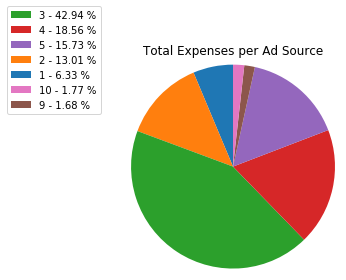

In [28]:
costs_overall = costs.groupby('source_id').agg({'costs': 'sum'})
display(costs_overall)
source_id = ['1', '2', '3', '4', '5', '9', '10']
percent = 100.*costs_overall['costs']/costs_overall['costs'].sum()

patches, texts = plt.pie(costs_overall['costs'], startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(source_id, percent)]
sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, costs_overall['costs']),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='center right', bbox_to_anchor=(-0.1, 1.),
           fontsize=10)

plt.savefig('piechart.png', bbox_inches='tight') 
plt.tight_layout()
plt.title("Total Expenses per Ad Source")
plt.show()

In [29]:
first_cost_date = costs.groupby(['source_id'])['dt'].min()
first_cost_date.name = 'first_cost_date'
costs = costs.join(first_cost_date, on='source_id')
costs['cost_week'] = pd.to_datetime(costs['dt'], unit='d') - pd.to_timedelta(costs['dt'].dt.dayofweek, unit='d')
costs['first_cost_week'] = pd.to_datetime(costs['first_cost_date'], unit='d') - pd.to_timedelta(
    costs['first_cost_date'].dt.dayofweek, unit='d'
)
costs['first_cost_month'] = costs['first_cost_date'].astype('datetime64[M]')

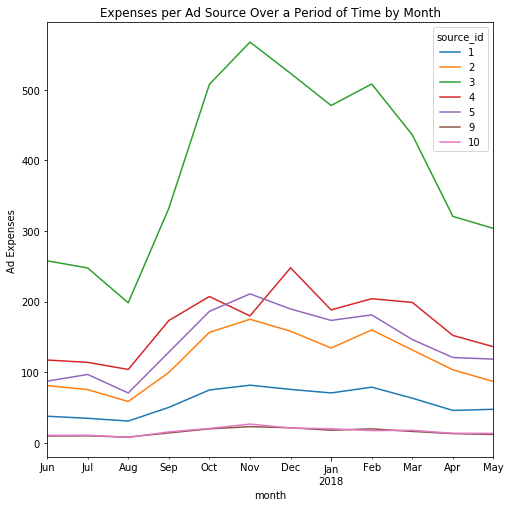

In [30]:
costs_expense = costs.pivot_table(index='month', columns='source_id', values='costs', aggfunc='mean')
ax = costs_expense.plot(figsize=(8,8))
ax.set_ylabel('Ad Expenses')
plt.title('Expenses per Ad Source Over a Period of Time by Month')
plt.show()

**Figure 10: Expenses per Ad Source Over a Period of Time by Month**

*Description:* The most money was spent on ad source #3. Expenses for ads were spent the most between October 2017 and December 2017.

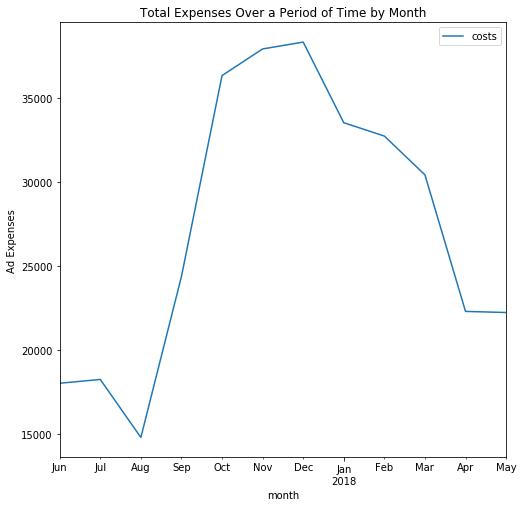

In [31]:
costs_total = costs.pivot_table(index='month', values='costs', aggfunc='sum')
ax = costs_total.plot(figsize=(8,8))
ax.set_ylabel('Ad Expenses')
plt.title('Total Expenses Over a Period of Time by Month')
plt.show()

**Figure 11: Total Expenses Over a Period of Time by Month**

*Description:* Expenses in ad sources started rising in August 2017. The most money being expended in ads was between October 2017 and December 2017. Afterward, ad expenses begin to fall and stabilize beginning of April 2018.

In [32]:
nbuyers = (first_orders.groupby('first_order_month').agg({'Uid': 'nunique'})).reset_index()
nbuyers.columns = ['date', 'n_buyers']
sum_cost_month = (costs.groupby('month').agg({'costs': 'sum'})).reset_index()
sum_cost_month.columns = ['date', 'costs']
monthly_cac = nbuyers.merge(sum_cost_month, on='date', how='left')
monthly_cac['cac'] = monthly_cac['costs'] / monthly_cac['n_buyers']

monthly_ltv = report_.pivot_table(index='first_order_month_x', values='ltv', aggfunc='sum').reset_index()
monthly_ltv.columns = ['date', 'ltv']

monthly_cac_ltv = monthly_cac.merge(monthly_ltv, on='date', how='left')
monthly_cac_ltv

,date,n_buyers,costs,cac,ltv
0,2017-06-01,2023,18015.00,8.905091,5.939617
1,2017-07-01,1923,18240.59,9.485486,4.193427
2,2017-08-01,1370,14790.54,10.796015,4.235861
3,2017-09-01,2581,24368.91,9.441654,6.717613
4,2017-10-01,4340,36322.88,8.369327,3.180121
5,2017-11-01,4081,37907.88,9.288870,3.197622
6,2017-12-01,4383,38315.35,8.741809,3.819957
7,2018-01-01,3373,33518.52,9.937302,2.470076
8,2018-02-01,3651,32723.03,8.962758,2.293961
9,2018-03-01,3533,30415.27,8.608907,2.727627


In [33]:
print('Average CAC:',monthly_cac_ltv['cac'].mean())
print()
print('Average LTV:',monthly_cac_ltv['ltv'].mean())

Average CAC: 9.147357292482544

Average LTV: 3.6417299945783608


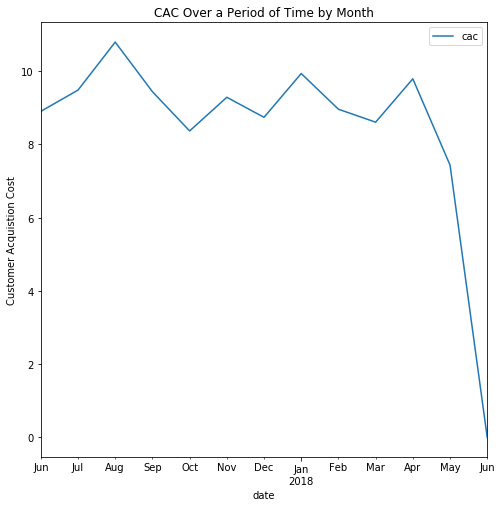

In [34]:
cac_graph = monthly_cac_ltv.pivot_table(index='date', values='cac', aggfunc='sum')
ax = cac_graph.plot(figsize=(8,8))
ax.set_ylabel('Customer Acquistion Cost')
plt.title('CAC Over a Period of Time by Month')
plt.show()

**Figure 12: CAC Over a Period of Time by Month**

*Description:* The most money spent on customer acquisition began in August 2017 and after that the CAC decreased a little bit and kept stable until after April 2018 where the graph illustrates a downward trend.

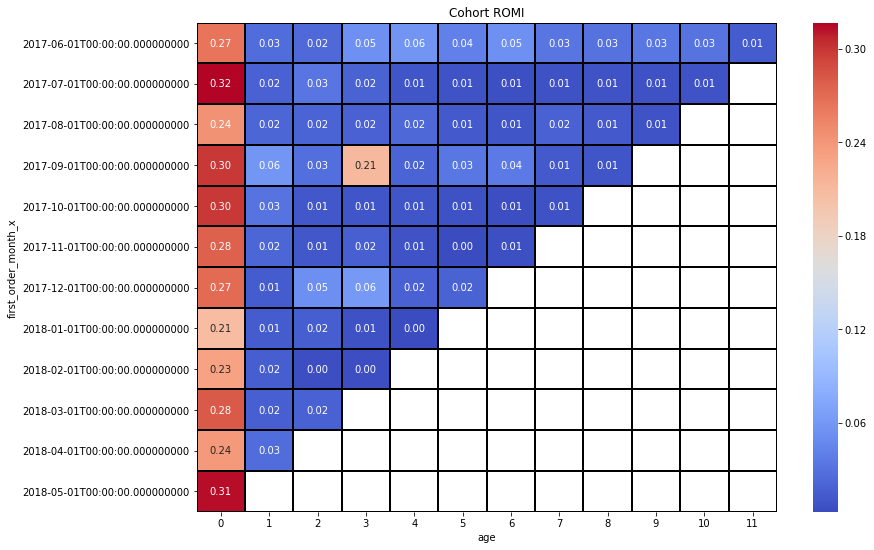

In [35]:
# calculating ROMI
report_['romi'] = report_['ltv'] / report_['cac']
result_romi = report_.pivot_table(
    index='first_order_month_x', columns='age', values='romi', aggfunc='mean'
)
plt.figure(figsize=(13, 9))
plt.title('Cohort ROMI')
sns.heatmap(
    result_romi,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='black',
    cmap='coolwarm',
)
plt.show()

**Figure 13: Cohort ROMI**

*Description:* The report shows that none of the cohorts paid off.

### Conclusion
According to the data, overall expenses spent on the ads was \\$329,131.62. Over time, expenses in ad sources started rising in August 2017. The most money being expended in ads was between October 2017 and December 2017. Afterward, ad expenses begin to fall and stabilize beginning of April 2018. Coincidentally, most expenses were allocated to ad source #3. Furthermore, acquiring each customer costs an average of \\$9.15 while each customer spends about \\$3.64 in their lifetime with regards to using/buying the company's product. The most money spent on customer acquisition began in August 2017 and after that the CAC decreased a little bit and kept stable until after April 2018 where the CAC illustrates a downward trend. In spite of this fact, the report shows that investments in marketing is unprofitable. This makes sense since CAC is greater than LTV. None of the cohorts display signs of the ROMI paying off&mdash;there is a significant decrease in ROMI by the next month of each cohort.